# Lending Club Case Study

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data Loading and Definition

In [4]:
# Load the loan dataset
dataset = pd.read_csv("datasets/loan.csv")

# Print shape and basic information about the dataset
print(dataset.shape)
print()
print(dataset.info())


/var/folders/2p/9gw5yt2107x8pysc311g20j80000gn/T/ipykernel_8051/4056007128.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("datasets/loan.csv")


(39717, 111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
# Print first 5 rows of the dataset
dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# List all the columns and prepare a data definition
dataset.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

# Data Cleaning

In [8]:
# Check the list of columns having more than 90% data as empty or null
dataset.columns[dataset.isna().sum() / len(dataset) > 0.9]

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [9]:
# Removing columns where most of the values are null
clean_dataset = dataset.drop(dataset.columns[dataset.isna().sum() / len(dataset) > 0.9], axis = 1)

# Print top 5 rows of the new dataset
clean_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
# Find columns having only 2 unique values
column_unique_values = {col_name: clean_dataset[col_name].unique() 
                        for col_name in clean_dataset.columns if len(clean_dataset[col_name].unique()) <= 2
                       }
column_unique_values

{'term': array([' 36 months', ' 60 months'], dtype=object),
 'pymnt_plan': array(['n'], dtype=object),
 'initial_list_status': array(['f'], dtype=object),
 'collections_12_mths_ex_med': array([ 0., nan]),
 'policy_code': array([1]),
 'application_type': array(['INDIVIDUAL'], dtype=object),
 'acc_now_delinq': array([0]),
 'chargeoff_within_12_mths': array([ 0., nan]),
 'delinq_amnt': array([0]),
 'tax_liens': array([ 0., nan])}

In [11]:
# Removing columns where there is only one logical unique value
clean_dataset = clean_dataset.drop(["tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
                                    "policy_code", "collections_12_mths_ex_med", "initial_list_status", "pymnt_plan"], axis = 1)

# Print top 5 rows of the new dataset
clean_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [12]:
# Removing columns where data itself is not significant for analysis
clean_dataset = clean_dataset.drop(["id", "member_id", "title", "emp_title", "desc", "url", "zip_code", "funded_amnt", "funded_amnt_inv", 
                                    "sub_grade", "out_prncp_inv", "total_pymnt_inv", "total_rec_prncp", "collection_recovery_fee", 
                                    "earliest_cr_line", "total_rec_int", "total_rec_late_fee", "last_credit_pull_d", "inq_last_6mths"], 
                                   axis = 1)

# Print top 5 rows of the new dataset
clean_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,83.70%,9,0.00,5863.155187,0.00,Jan-15,171.62,0.0
1,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,9.40%,4,0.00,1008.710000,117.08,Apr-13,119.66,0.0
2,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,98.50%,10,0.00,3005.666844,0.00,Jun-14,649.91,0.0
3,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,21%,37,0.00,12231.890000,0.00,Jan-15,357.48,0.0
4,3000,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,0,27783,53.90%,38,524.06,3513.330000,0.00,May-16,67.79,0.0


# Data Fixing

In [14]:
# Copy the dataset into a separate variable for further processing
fixed_dataset = clean_dataset.copy(deep=True)

In [15]:
# Strip "months" from term and convert to int
fixed_dataset["term"] = fixed_dataset["term"].apply(lambda val: int(val[:-7]))

# Strip "%" from int_rate and convert to float
fixed_dataset["int_rate"] = fixed_dataset["int_rate"].apply(lambda val: float(val[:-1]))

# Decrease precision in total_pymnt to 2 decimal digits
fixed_dataset["total_pymnt"] = fixed_dataset["total_pymnt"].apply(lambda val: round(val, 2))
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,83.70%,9,0.00,5863.16,0.00,Jan-15,171.62,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,9.40%,4,0.00,1008.71,117.08,Apr-13,119.66,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,98.50%,10,0.00,3005.67,0.00,Jun-14,649.91,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,21%,37,0.00,12231.89,0.00,Jan-15,357.48,0.0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,0,27783,53.90%,38,524.06,3513.33,0.00,May-16,67.79,0.0


In [16]:
# Fill revol_util with 0% where revol_bal is 0
blank_revol_bal = (fixed_dataset["revol_bal"] == 0) & (fixed_dataset["revol_util"].isna())
fixed_dataset.loc[blank_revol_bal, "revol_util"] = fixed_dataset.loc[blank_revol_bal, "revol_util"].fillna("0%")

# Removing the row where revol_bal is not 0 and revol_util is na
fixed_dataset = fixed_dataset[~((fixed_dataset["revol_bal"] != 0) & (fixed_dataset["revol_util"].isna()))]

# Strip "%" from revol_util and convert to float
fixed_dataset["revol_util"] = fixed_dataset["revol_util"].apply(lambda val: float(val[:-1]))
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,83.7,9,0.00,5863.16,0.00,Jan-15,171.62,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,9.4,4,0.00,1008.71,117.08,Apr-13,119.66,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,98.5,10,0.00,3005.67,0.00,Jun-14,649.91,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,21.0,37,0.00,12231.89,0.00,Jan-15,357.48,0.0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,0,27783,53.9,38,524.06,3513.33,0.00,May-16,67.79,0.0


In [17]:
# Fill NA bankruptcies as median in the dataset
pub_bankruptcies_median = np.median(fixed_dataset[~fixed_dataset.pub_rec_bankruptcies.isna()]["pub_rec_bankruptcies"])
fixed_dataset.pub_rec_bankruptcies.fillna(pub_bankruptcies_median, inplace=True)

# Fix data type for mths_since_last_delinq to integer
fixed_dataset = fixed_dataset.astype({"pub_rec_bankruptcies": "int"})
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,0,13648,83.7,9,0.00,5863.16,0.00,Jan-15,171.62,0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,0,1687,9.4,4,0.00,1008.71,117.08,Apr-13,119.66,0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,0,2956,98.5,10,0.00,3005.67,0.00,Jun-14,649.91,0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,0,5598,21.0,37,0.00,12231.89,0.00,Jan-15,357.48,0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,0,27783,53.9,38,524.06,3513.33,0.00,May-16,67.79,0


In [18]:
# Fill empty Last Payment date with issue date (all the cases are charged-off)
empty_last_payment = fixed_dataset.last_pymnt_d.isna()
fixed_dataset.loc[empty_last_payment, "last_pymnt_d"] = fixed_dataset.loc[empty_last_payment, "issue_d"]

# Breakup the last payment date field into individual components of month and year
last_payment_datetime = pd.to_datetime(fixed_dataset["last_pymnt_d"], format="%b-%y")

fixed_dataset["last_pymnt_month"] = last_payment_datetime.dt.month
fixed_dataset["last_pymnt_year"] = last_payment_datetime.dt.year;

# Remove last_pymnt_d column and print the top 5 rows
fixed_dataset = fixed_dataset.drop(["last_pymnt_d"], axis = 1)
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,...,13648,83.7,9,0.00,5863.16,0.00,171.62,0,1,2015
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,1687,9.4,4,0.00,1008.71,117.08,119.66,0,4,2013
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,...,2956,98.5,10,0.00,3005.67,0.00,649.91,0,6,2014
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,...,5598,21.0,37,0.00,12231.89,0.00,357.48,0,1,2015
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,...,27783,53.9,38,524.06,3513.33,0.00,67.79,0,5,2016


In [19]:
# Breakup the issue date field into individual components of month and year
issue_datetime = pd.to_datetime(fixed_dataset["issue_d"], format="%b-%y")

fixed_dataset["issue_month"] = issue_datetime.dt.month
fixed_dataset["issue_year"] = issue_datetime.dt.year;

# Remove issue_d column and print the top 5 rows
fixed_dataset = fixed_dataset.drop(["issue_d"], axis = 1)
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,9,0.00,5863.16,0.00,171.62,0,1,2015,12,2011
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,4,0.00,1008.71,117.08,119.66,0,4,2013,12,2011
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,10,0.00,3005.67,0.00,649.91,0,6,2014,12,2011
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,37,0.00,12231.89,0.00,357.48,0,1,2015,12,2011
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,...,38,524.06,3513.33,0.00,67.79,0,5,2016,12,2011


In [20]:
# Removing all entries where the loan is ongoing as not important for analysis
fixed_dataset = fixed_dataset[fixed_dataset["loan_status"] != "Current"]
fixed_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,out_prncp,total_pymnt,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,9,0.0,5863.16,0.00,171.62,0,1,2015,12,2011
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,4,0.0,1008.71,117.08,119.66,0,4,2013,12,2011
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,10,0.0,3005.67,0.00,649.91,0,6,2014,12,2011
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,37,0.0,12231.89,0.00,357.48,0,1,2015,12,2011
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,...,12,0.0,5632.21,0.00,161.03,0,1,2015,12,2011


In [21]:
# Find unique values against all the columns
print(fixed_dataset.nunique())

# Copy the dataset into final for analysis
final_dataset = fixed_dataset.copy(deep=True)

labels = {"loan_amnt": "Loan Amount", "term": "Loan Term (in yrs)", "int_rate": "Interest Rate (%)", "installment": "Installment Amount", 
          "grade": "Loan Grade", "emp_length": "Employment Length", "home_ownership": "Home Ownership", "annual_inc": "Annual Income", 
          "verification_status": "Verification Status", "loan_status": "Loan Status", "purpose": "Purpose", "addr_state": "Address State", 
          "dti": "Debt-to-income Ratio", "delinq_2yrs": "Delinquency in last 2 yrs", "mths_since_last_delinq": "Months since last deliquency",
          "pub_rec_bankruptcies": "Publically recorded Bankruptcies", "open_acc": "No. of Open Accounts", "pub_rec": "No. of Public Records",
          "revol_bal": "Total Revolving Credit Balance", "revol_util": "Revolving Credit Utilization", "total_acc": "No. of Total Accounts",
          "out_prncp": "Outstanding Principle", "recoveries": "Post Charge-off Recovery", "issue_month": "Loan Issue (Month)",
          "issue_year": "Loan Issue (Year)", "last_pymnt_amnt": "Last Payment Amount", "last_pymnt_month": "Last Payment (Month)",
          "last_pymnt_year": "Last Payment (Year)", "total_pymnt": "Total Payment"
         }  

loan_amnt                   870
term                          2
int_rate                    370
installment               15022
grade                         7
emp_length                   11
home_ownership                5
annual_inc                 5215
verification_status           3
loan_status                   2
purpose                      14
addr_state                   50
dti                        2853
delinq_2yrs                  11
mths_since_last_delinq       95
open_acc                     40
pub_rec                       5
revol_bal                 21275
revol_util                 1088
total_acc                    82
out_prncp                     1
total_pymnt               35461
recoveries                 4040
last_pymnt_amnt           34418
pub_rec_bankruptcies          3
last_pymnt_month             12
last_pymnt_year               9
issue_month                  12
issue_year                    5
dtype: int64


# Univariate Analysis

In [23]:
# Order the categorical data in a sequence for better analysis
final_dataset["grade"] = pd.Categorical(final_dataset["grade"], ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
final_dataset["emp_length"] = pd.Categorical(final_dataset["emp_length"], ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years",
                                                                           "6 years", "7 years", "8 years", "9 years", "10+ years"])
final_dataset["verification_status"] = pd.Categorical(final_dataset["verification_status"], ["Not Verified", "Source Verified", "Verified"])

# Create a color palette to circle through
colors = plt.rcParams["axes.prop_cycle"]()

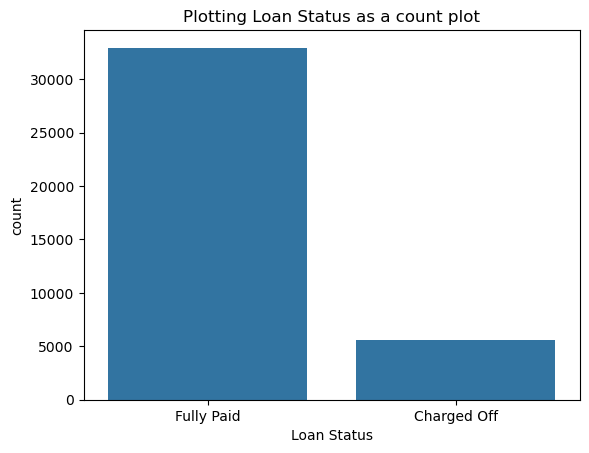

In [24]:
# Plot the key column (loan status) as count plots

sns.countplot(x=final_dataset["loan_status"], color=next(colors)["color"])
plt.xlabel(labels["loan_status"])
plt.title("Plotting Loan Status as a count plot")

# Show the final plot
plt.show()

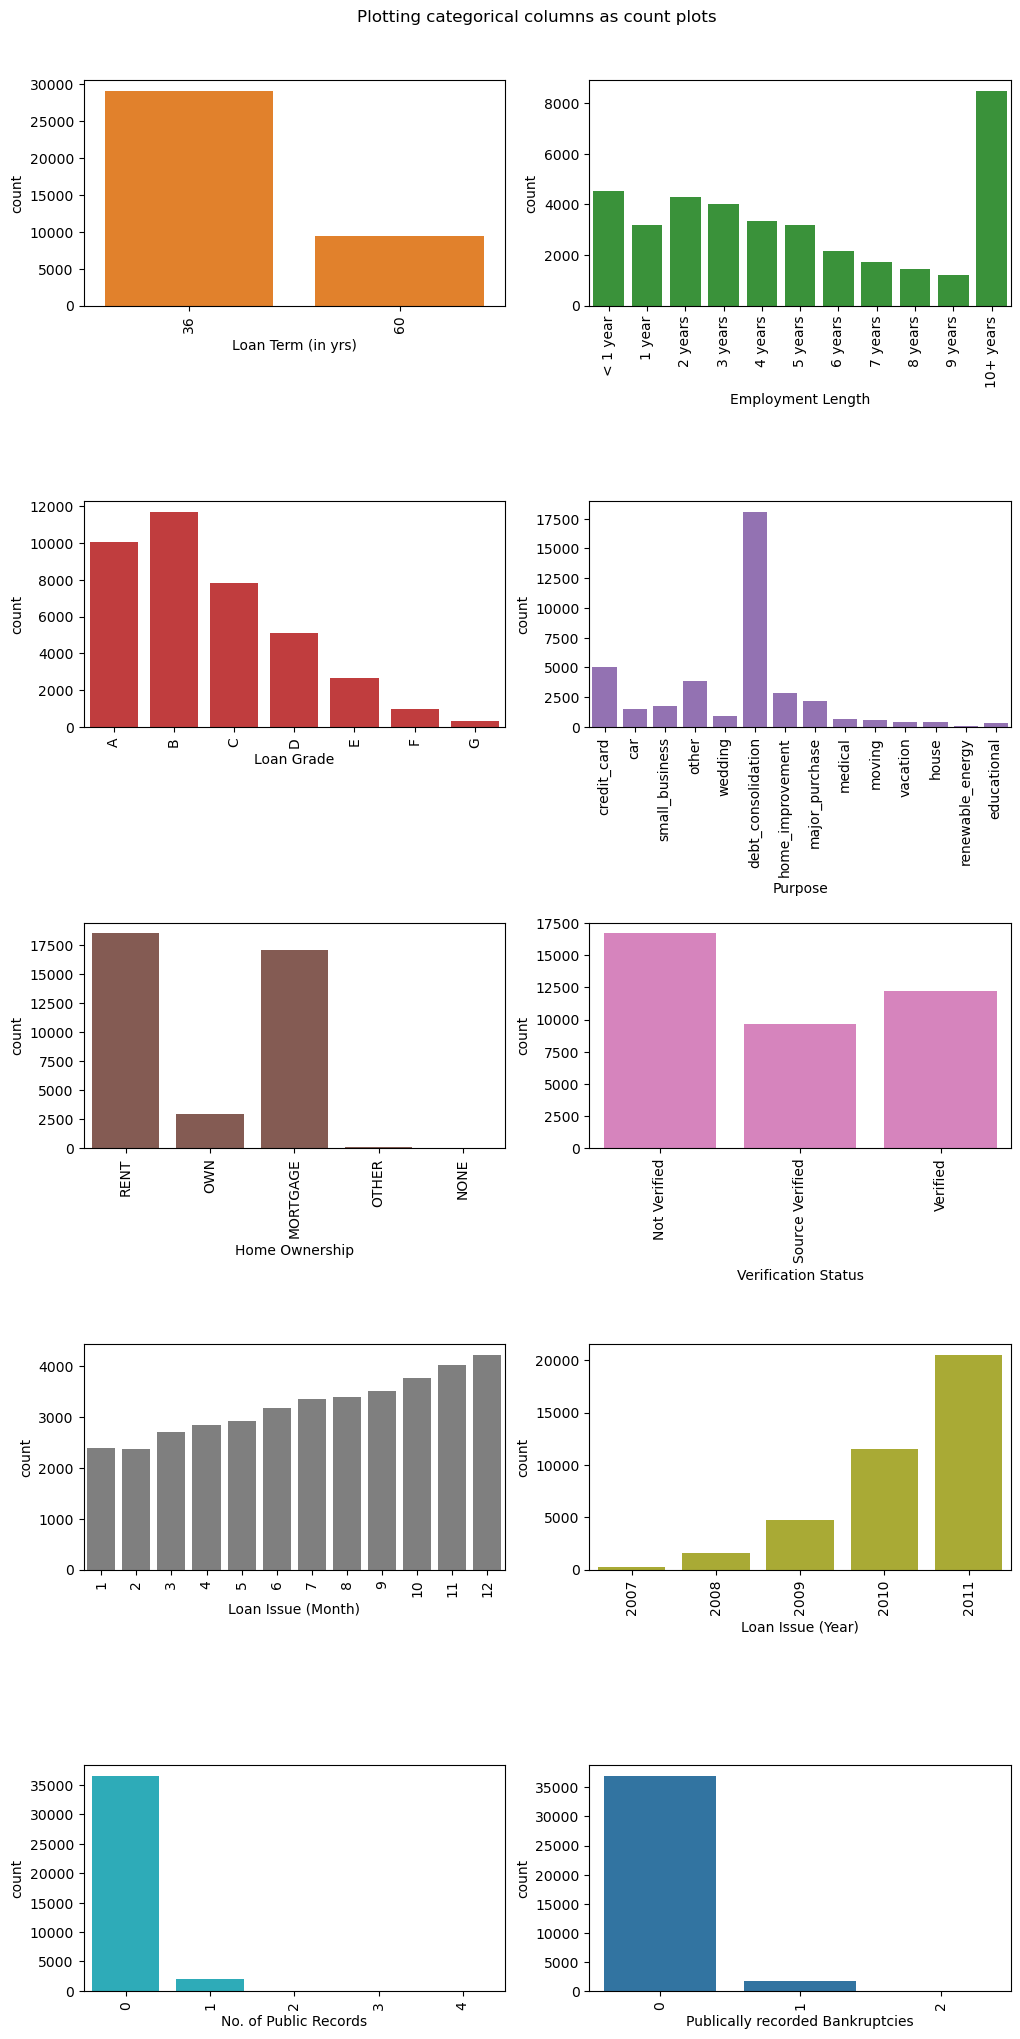

In [25]:
# Plot all the categorical columns as count plots
cat_cols = ["term", "emp_length", "grade", "purpose", "home_ownership", "verification_status", "issue_month", "issue_year", "pub_rec",
            "pub_rec_bankruptcies"]

dimX = math.ceil(len(cat_cols) / 2)
dimY = 2
i = 0
j = 0

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(4 * dimX)
fig.suptitle("Plotting categorical columns as count plots", y=1.01)
fig.tight_layout(h_pad=12, w_pad=3)

# Loop through all the key columns and draw a count plot
for col in cat_cols:
    col_plot = sns.countplot(ax = axs[i][j], x = final_dataset[col], color=next(colors)["color"])
    col_plot.set_xlabel(labels[col])
    axs[i][j].tick_params(axis='x', labelrotation=90)
    j += 1
    if j == dimY:
        i += 1
        j = 0

# Show the final plot
plt.show()

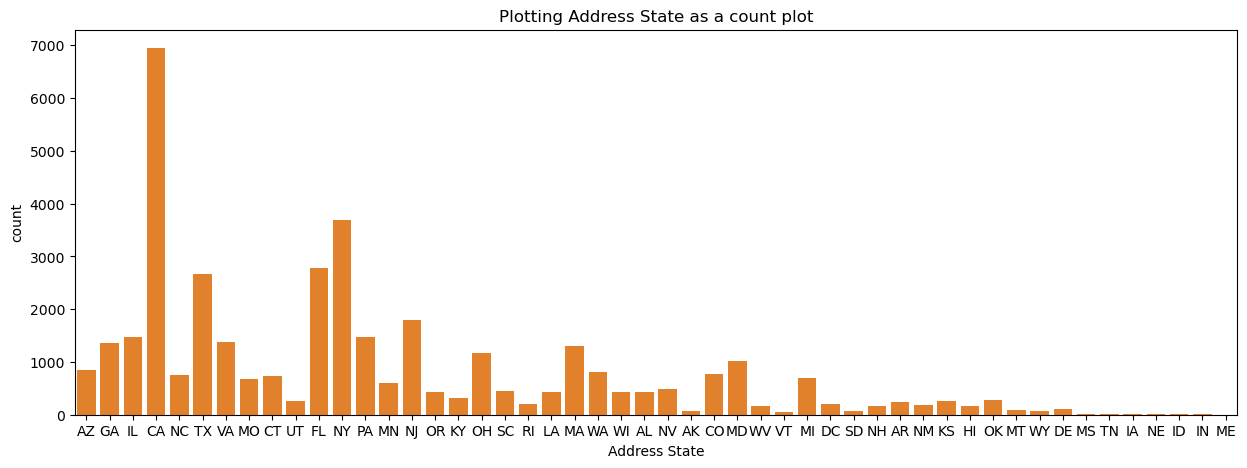

In [26]:
# Plot the address state as count plots

plt.figure(figsize=[15, 5])
sns.countplot(x=final_dataset["addr_state"], color=next(colors)["color"])
plt.xlabel(labels["addr_state"])
plt.title("Plotting Address State as a count plot")

# Show the final plot
plt.show()

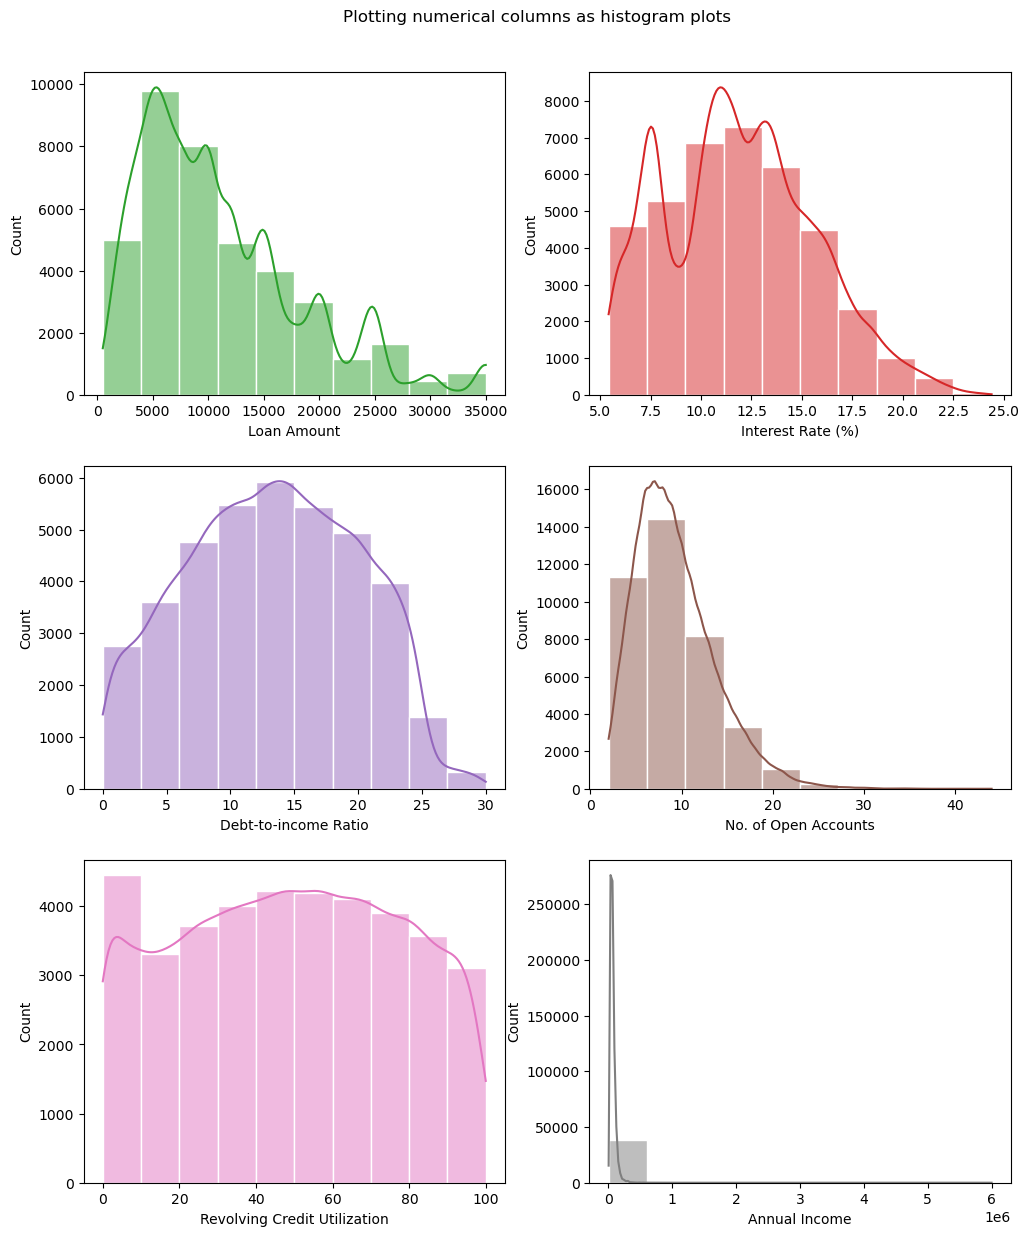

In [27]:
# Plot all the numerical columns as hist plots
num_cols = ["loan_amnt", "int_rate", "dti", "open_acc", "revol_util", "annual_inc"]

dimX = 3
dimY = 2
i = 0
j = 0

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(12)
fig.suptitle("Plotting numerical columns as histogram plots", y=1.01)
fig.tight_layout(h_pad=3, w_pad=3)

# Loop through all the key columns and draw a count plot
for col in num_cols:
    col_plot = sns.histplot(ax = axs[i][j], x = final_dataset[col], color=next(colors)["color"], edgecolor="white", bins = 10, kde=True)
    col_plot.set_xlabel(labels[col])
    j += 1
    if j == dimY:
        i += 1
        j = 0

# Show the final plot
plt.show()

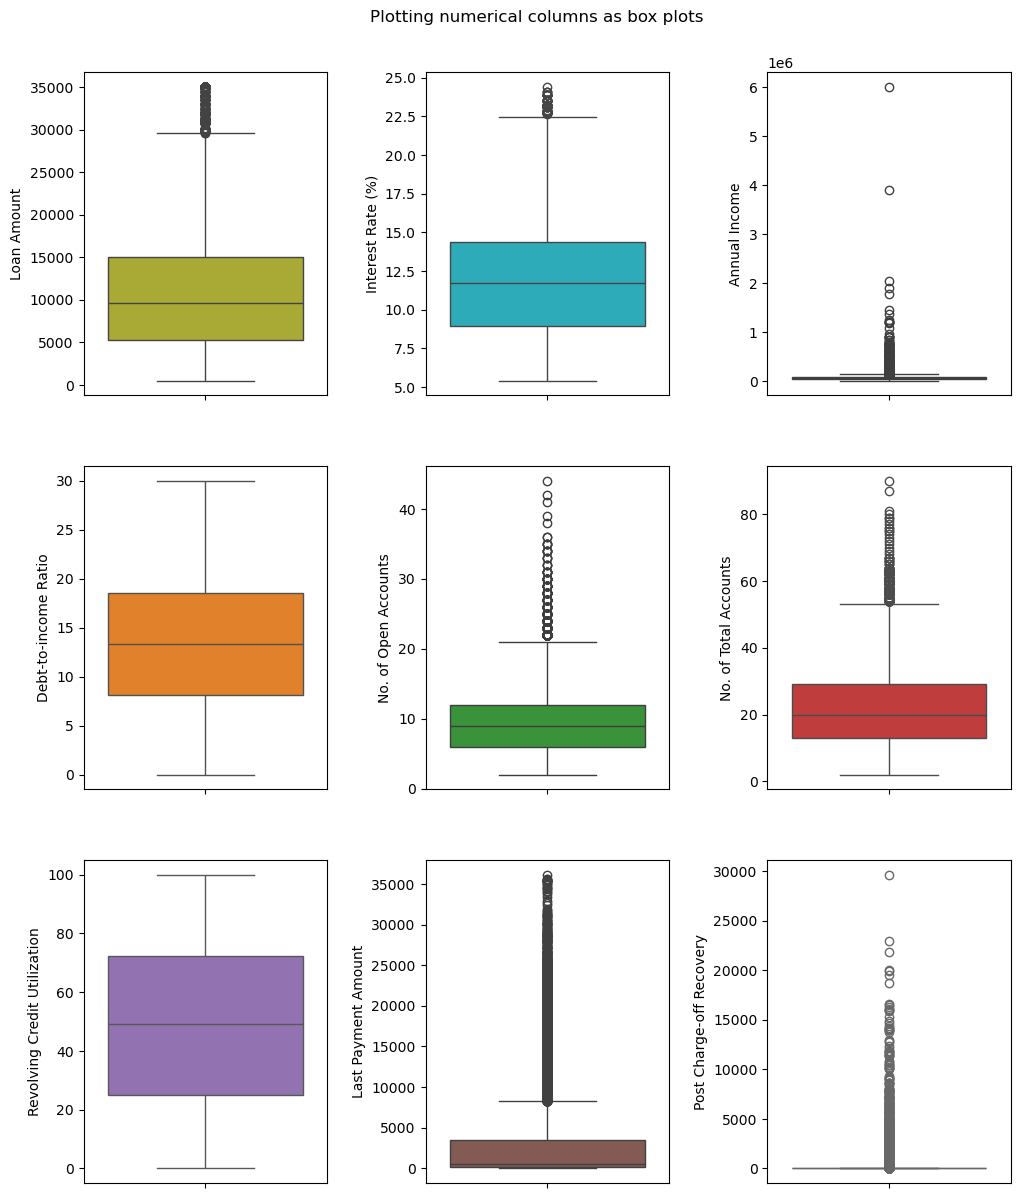

In [28]:
# Plot some of the numerical columns as box plots
dimX = 3
dimY = 3
i = 0
j = 0

num_box_cols = ["loan_amnt", "int_rate", "annual_inc", "dti", "open_acc", "total_acc", "revol_util", "last_pymnt_amnt", "recoveries"]

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(4 * dimX)
fig.suptitle("Plotting numerical columns as box plots", y=1.01)
fig.tight_layout(h_pad=3, w_pad=4)

# Loop through all the key columns and draw a count plot
for col in num_box_cols:
    col_plot = sns.boxplot(ax = axs[i][j], data = final_dataset[col], orient='x', color=next(colors)["color"])
    col_plot.set_ylabel(labels[col])
    j += 1
    if j == dimY:
        i += 1
        j = 0

# Show the final plot
plt.show()

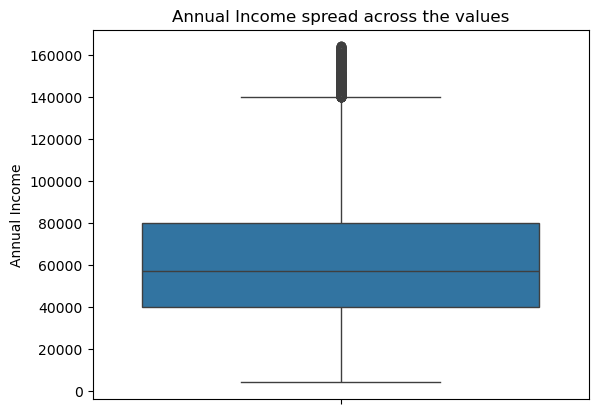

In [29]:
# Remove Annual Income Outliers (more than 97 percentile)
final_dataset = final_dataset[final_dataset["annual_inc"] < final_dataset["annual_inc"].quantile(0.97)]

# Plot the Annual Income again as a boxplot
plot = sns.boxplot(data = final_dataset["annual_inc"], orient='x')
plot.set_ylabel(labels["annual_inc"])
plt.title("Annual Income spread across the values")
plt.show()

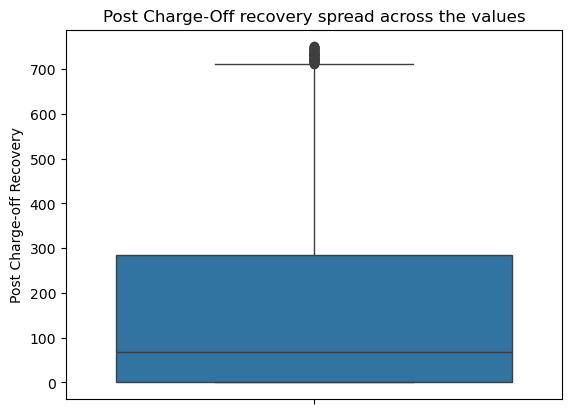

In [30]:
# Remove Recoveries Outliers (more than 97 percentile)
final_dataset = final_dataset[final_dataset["recoveries"] < final_dataset["recoveries"].quantile(0.97)]

# Plot the Recoveries again as a boxplot only where loan status is charged off
plot = sns.boxplot(data = final_dataset[final_dataset["loan_status"] == "Charged Off"]["recoveries"], orient='x')
plot.set_ylabel(labels["recoveries"])
plt.title("Post Charge-Off recovery spread across the values")
plt.show()

# Segmented Univariate Analysis

In [32]:
# Create a function to plot different columns as per a specified segment
def plot_segmented(dataset, segment, columns):
    
    # Plot some of the numerical columns against segments as box plots
    dimX = math.ceil(len(columns) / 3)
    dimY = 3
    i = 0
    j = 0
    
    fig, axs = plt.subplots(dimX, dimY)
    fig.set_figwidth(10)
    fig.set_figheight(dimX * 4)
    fig.suptitle("Plotting numerical columns for the segment " + segment, y=1.01)
    fig.tight_layout(h_pad=9, w_pad=4)
    
    # Loop through all the key columns and draw a count plot
    for col in columns:
        col_plot = sns.boxplot(ax = axs[i][j], data = dataset, x=segment, y=col, orient='x', color=next(colors)["color"])
        col_plot.set_xlabel(labels[segment])
        col_plot.set_ylabel(labels[col])
        axs[i][j].tick_params(axis='x', labelrotation=90)
        j += 1
        if j == dimY:
            i += 1
            j = 0
    
    # Show the final plot
    plt.show()

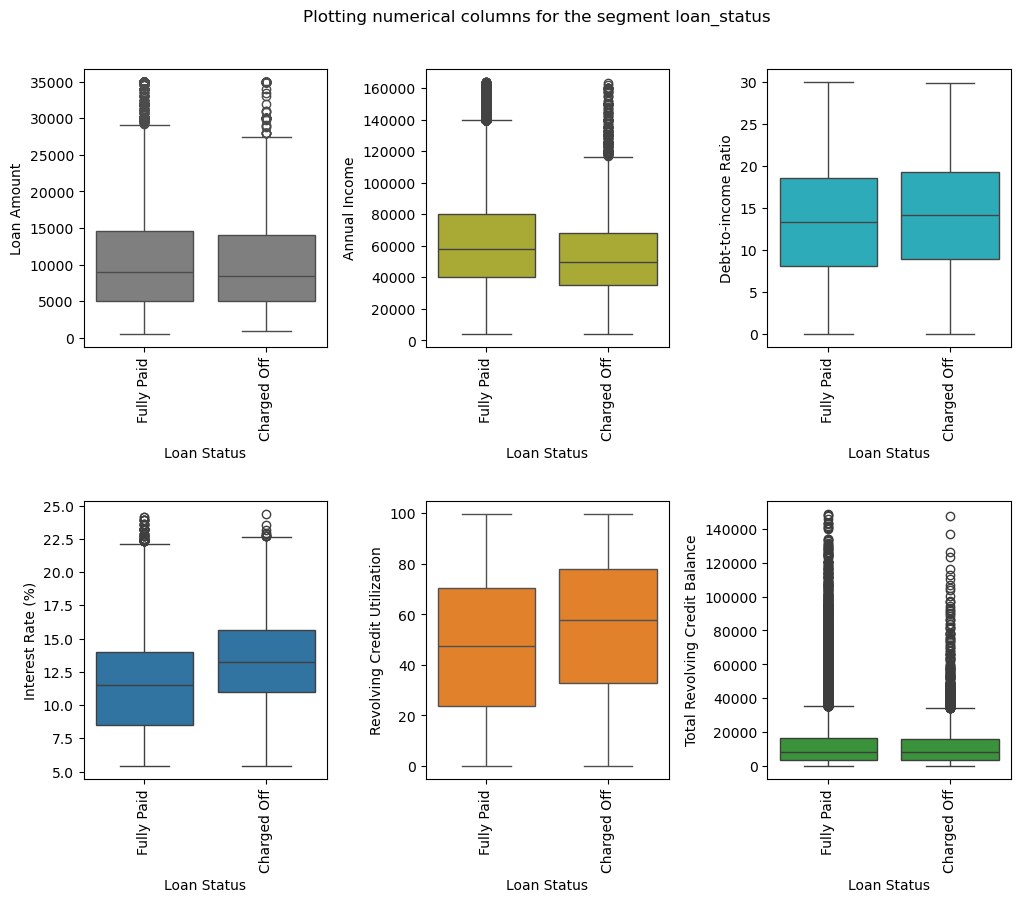

In [33]:
# Plot various columns against loan_status segment to understand the pattern
plot_segmented(final_dataset, "loan_status", ["loan_amnt", "annual_inc", "dti", "int_rate", "revol_util", "revol_bal"])

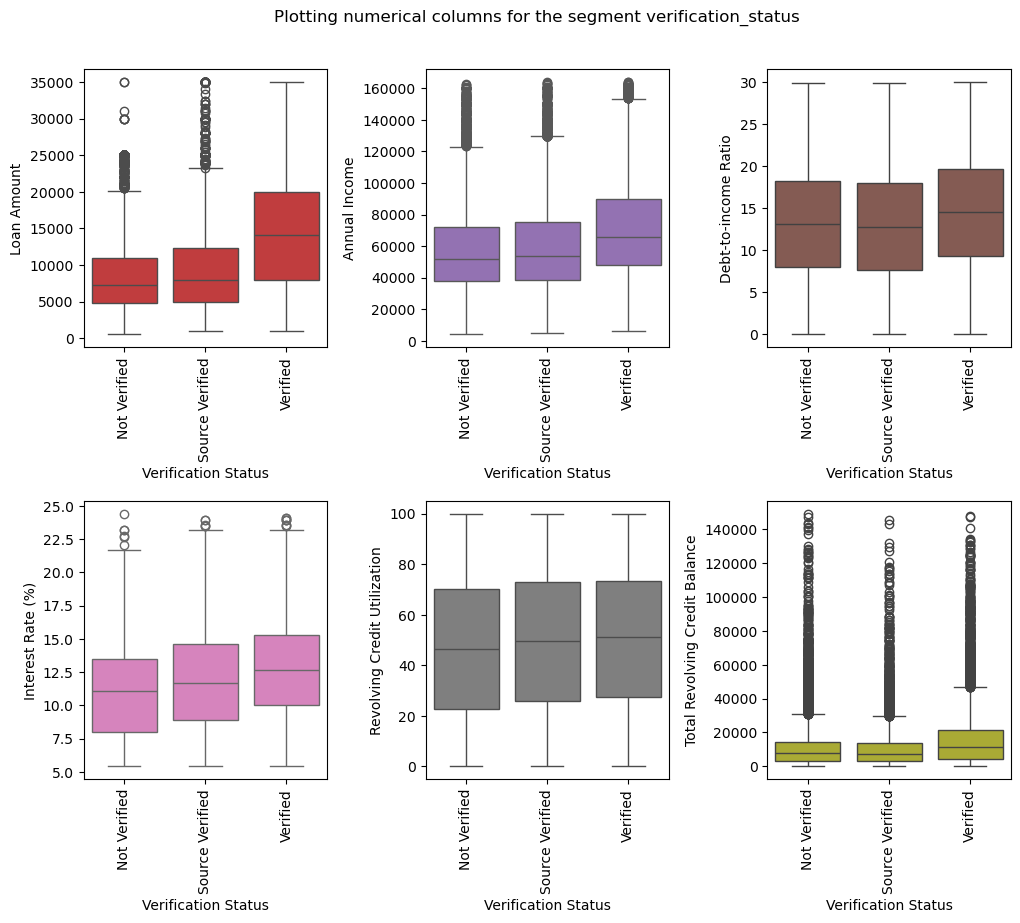

In [34]:
# Plot various columns against verification_status segment to understand the pattern
plot_segmented(final_dataset, "verification_status", ["loan_amnt", "annual_inc", "dti", "int_rate", "revol_util", "revol_bal"])

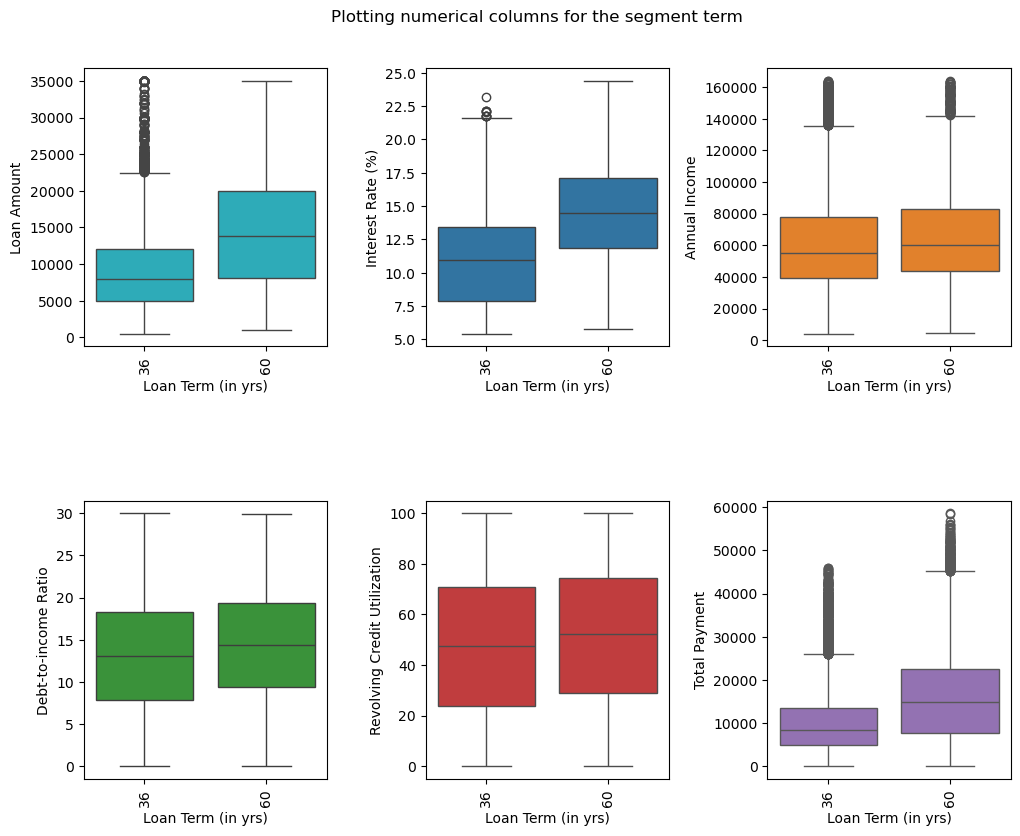

In [35]:
# Plot various columns against term segment to understand the pattern
plot_segmented(final_dataset, "term", ["loan_amnt", "int_rate", "annual_inc", "dti", "revol_util", "total_pymnt"])

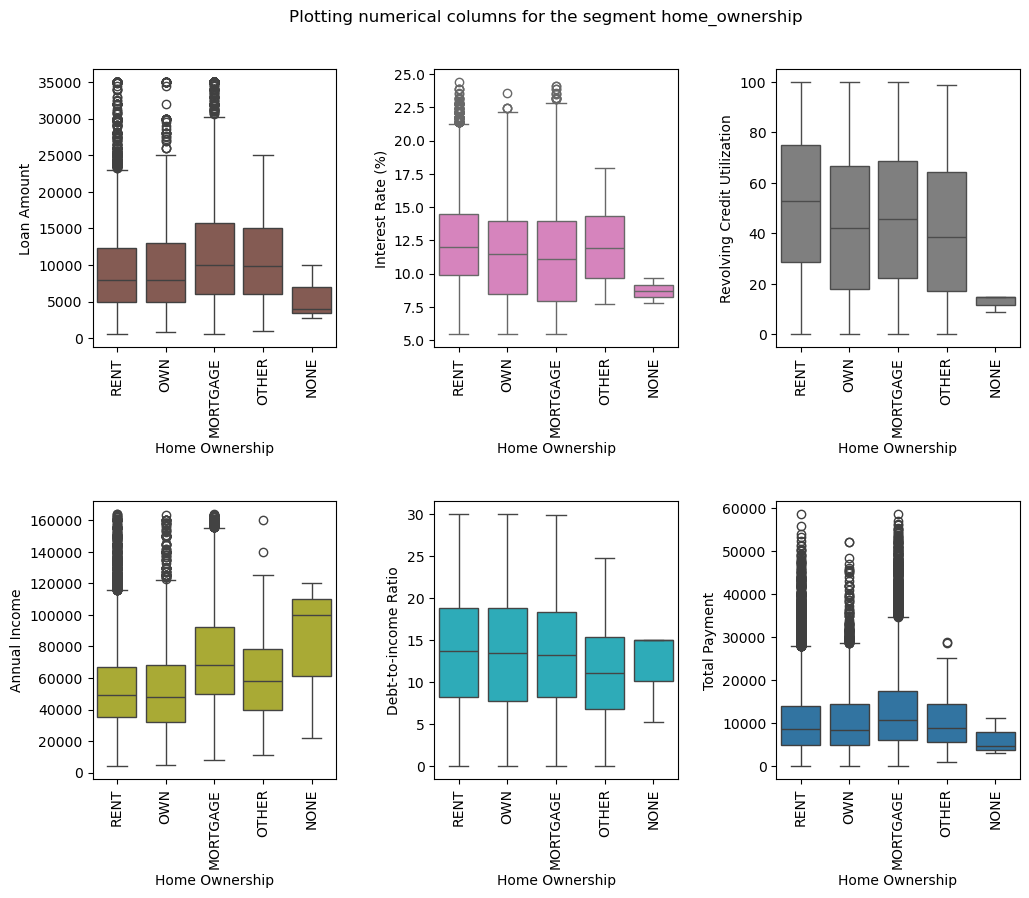

In [36]:
# Plot various columns against home_ownership segment to understand the pattern
plot_segmented(final_dataset, "home_ownership", ["loan_amnt", "int_rate", "revol_util", "annual_inc", "dti", "total_pymnt"])

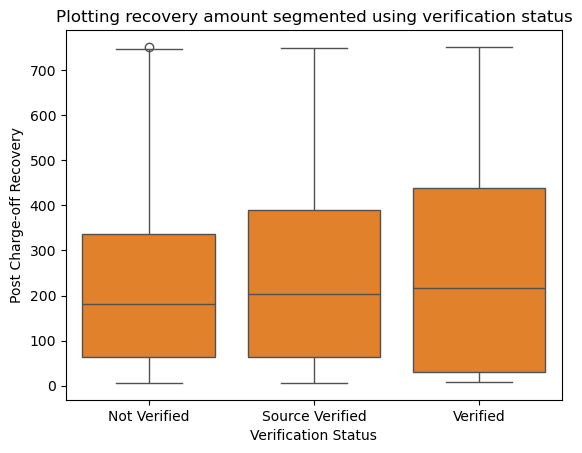

In [37]:
# Plot recoveries taking verification_status as segment but only including data where recovery > 0
plot = sns.boxplot(data = final_dataset[final_dataset.recoveries > 0], x="verification_status", y="recoveries", orient='x', color=next(colors)["color"])
plot.set_xlabel(labels["verification_status"])
plot.set_ylabel(labels["recoveries"])
plt.title("Plotting recovery amount segmented using verification status")
plt.show()

# Bivariate Analysis

In [39]:
# Create a function to plot different columns against the specified column as a scatter plot
def plot_scatter(dataset, primary, secondaries):
    
    # Plot some of the numerical columns against other numerical columns as scatter plots
    dimX = math.ceil(len(secondaries) / 2)
    dimY = 2
    i = 0
    j = 0
    
    fig, axs = plt.subplots(dimX, dimY)
    fig.set_figwidth(10)
    fig.set_figheight(4 * dimX)
    fig.suptitle("Plotting numerical columns against " + labels[primary], y=1.01)
    fig.tight_layout(h_pad=6, w_pad=4)
    
    # Loop through all the key columns and draw a count plot
    for col in secondaries:
        col_plot = sns.scatterplot(ax = axs[i][j], data = dataset, x=primary, y=col, color=next(colors)["color"])
        col_plot.set_xlabel(labels[primary])
        col_plot.set_ylabel(labels[col])
        axs[i][j].tick_params(axis='x', labelrotation=90)
        j += 1
        if j == dimY:
            i += 1
            j = 0
    
    # Show the final plot
    plt.show()

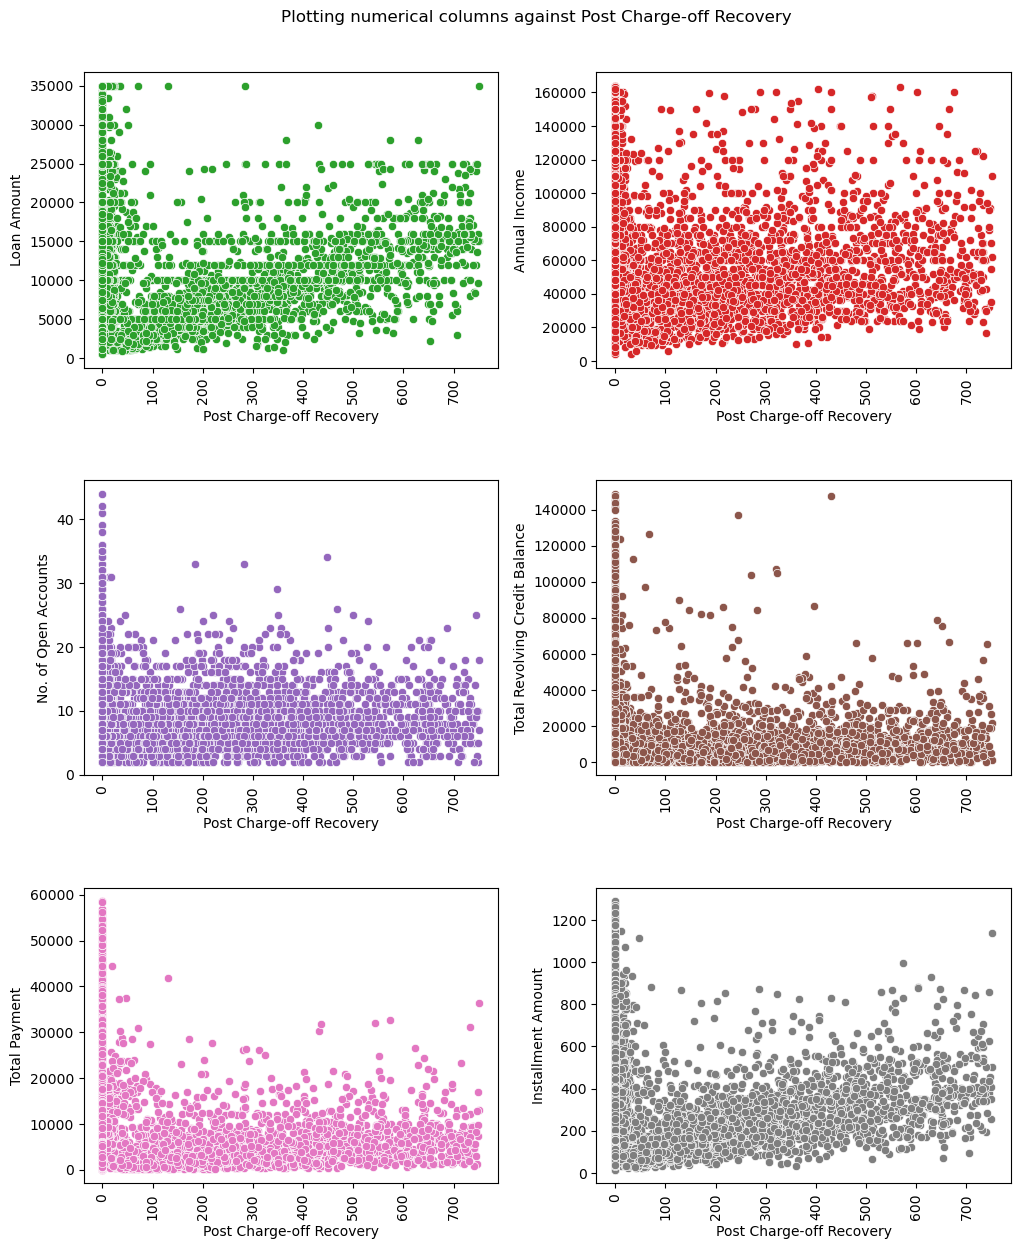

In [40]:
# Plot recovery amount against loan amount, annual income etc to understand relative pattern
plot_scatter(final_dataset, "recoveries", ["loan_amnt", "annual_inc", "open_acc", "revol_bal", "total_pymnt", "installment"])

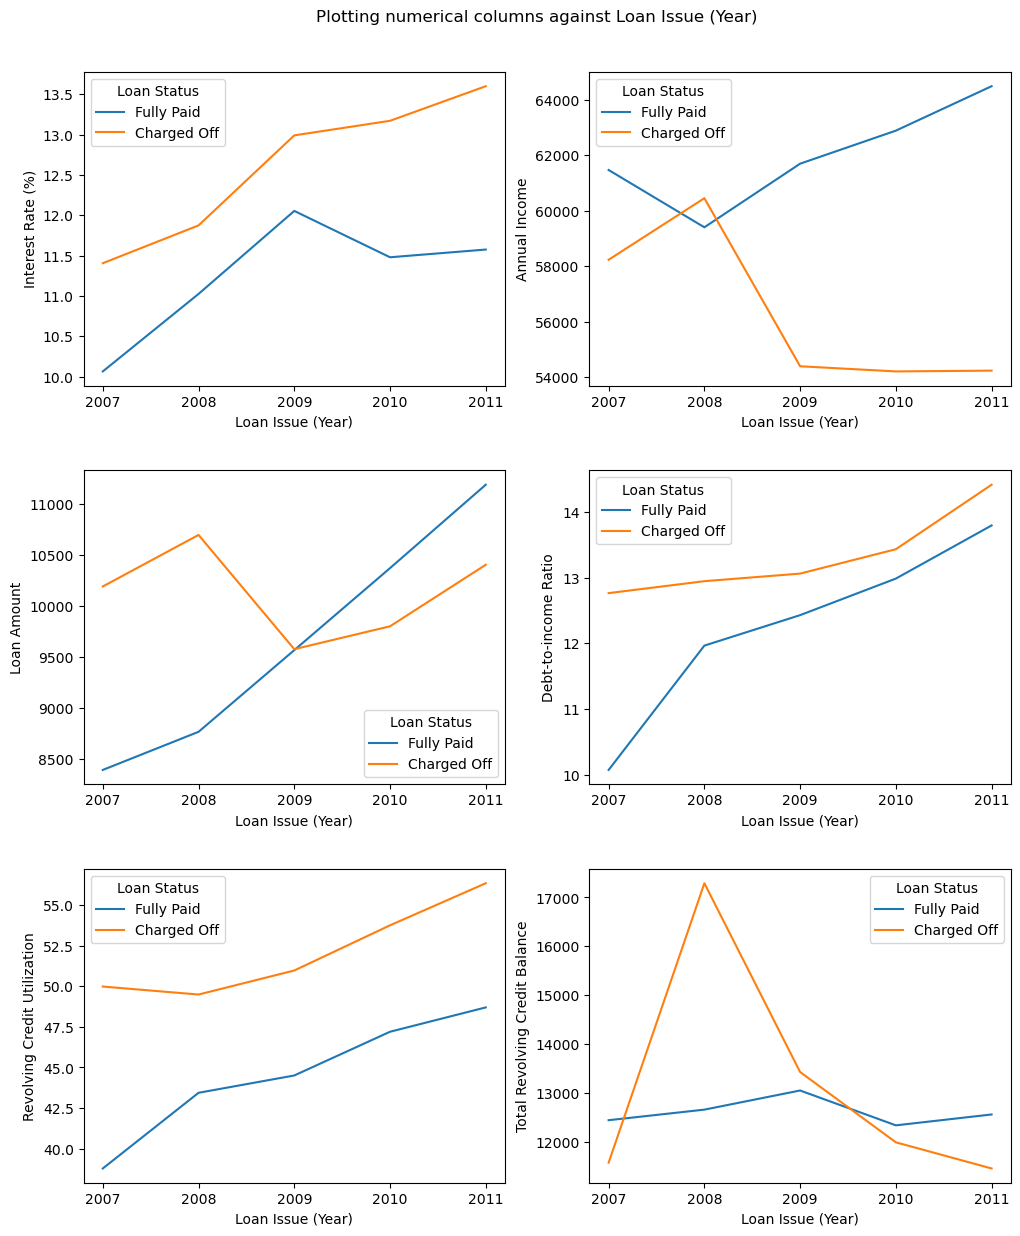

In [41]:
# Plot loan amount, interest rate etc in the order of increasing issue year segmented by loan status to observe any visible pattern
columns = ["int_rate", "annual_inc", "loan_amnt", "dti", "revol_util", "revol_bal"]

dimX = math.ceil(len(columns) / 2)
dimY = 2
i = 0
j = 0

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(4 * dimX)
fig.suptitle("Plotting numerical columns against " + labels["issue_year"], y=1.01)
fig.tight_layout(h_pad=4, w_pad=3)

# Loop through all the key columns and draw a count plot
for col in columns:
    col_plot = sns.lineplot(ax=axs[i][j], data=final_dataset, x="issue_year", y=col, hue="loan_status", errorbar=None, legend="full")
    col_plot.set_xlabel(labels["issue_year"])
    col_plot.set_ylabel(labels[col])
    col_plot.legend(title=labels["loan_status"])
    col_plot.set_xticks(final_dataset["issue_year"].unique().tolist())
    j += 1
    if j == dimY:
        i += 1
        j = 0
    
# Show the final plot
plt.show()

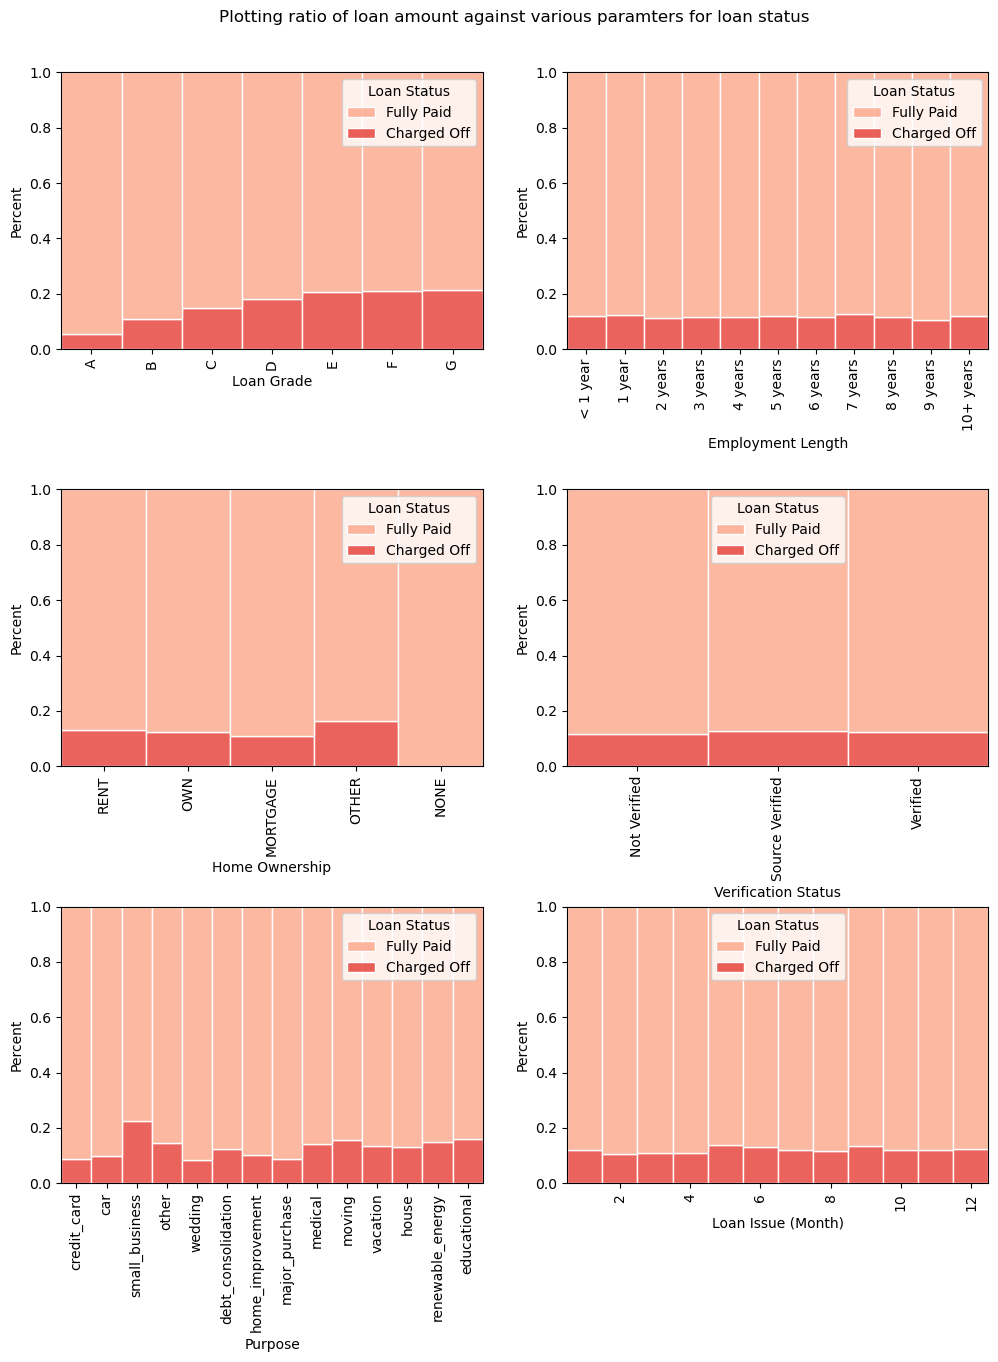

In [42]:
# Plot loan amount ratio using loan status for various categorical variables
columns = ["grade", "emp_length", "home_ownership", "verification_status", "purpose", "issue_month"]
unique_loan_status = final_dataset["loan_status"].unique()

dimX = 3
dimY = 2
i = 0
j = 0

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(4 * dimX)
fig.suptitle("Plotting ratio of loan amount against various paramters for loan status", y=1.01)
fig.tight_layout(h_pad=8, w_pad=3)

for col in columns:
    col_plot = sns.histplot(ax=axs[i][j], data=final_dataset, x=col, hue="loan_status", stat="percent", multiple="fill", 
                            discrete=True, edgecolor="white", palette="Reds")
    col_plot.set_xlabel(labels[col])
    axs[i][j].tick_params(axis='x', labelrotation=90)
    col_plot.get_legend().set_title("Loan Status")
    j += 1
    if j == dimY:
        i += 1
        j = 0

plt.show()

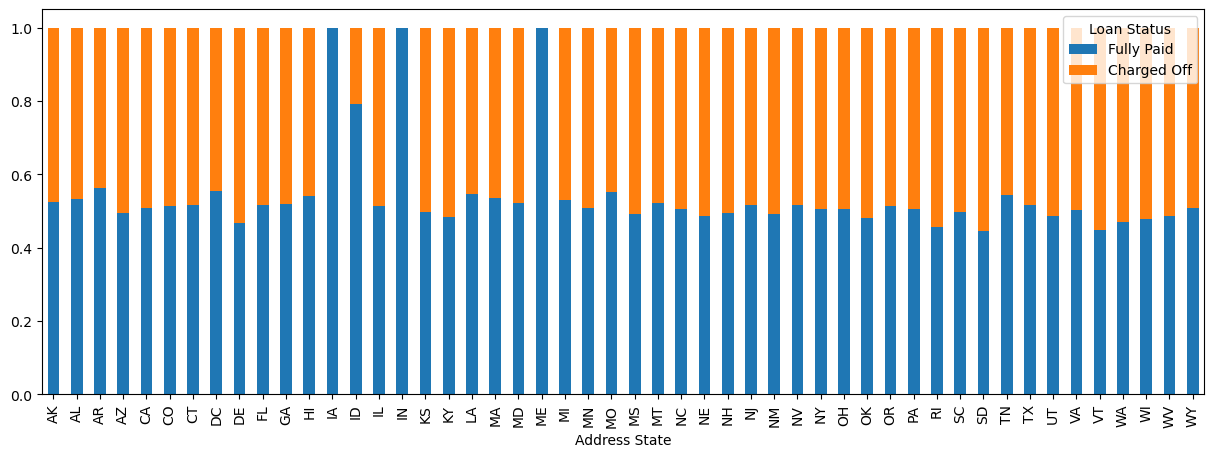

In [43]:
# Plot the address state against mean loan amnt grouped as per loan status
result = pd.pivot_table(final_dataset, index="addr_state", columns="loan_status", values="loan_amnt", aggfunc="mean")
col_plot = result[unique_loan_status].apply(lambda row: row/row.sum(), axis=1).plot(kind="bar", figsize=[15, 5], stacked=True)
col_plot.legend(unique_loan_status, title="Loan Status")
col_plot.set_xlabel(labels["addr_state"])

# Show the final plot
plt.show()

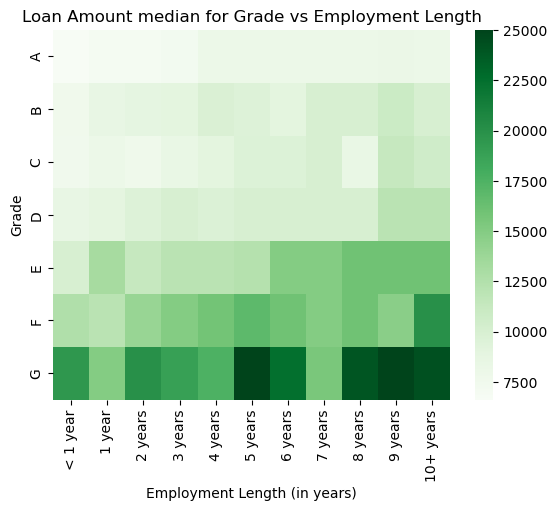

In [44]:
# Plotting median loan amount for Grade vs Employment Length to understand
grade_vs_emp_length = pd.pivot_table(final_dataset, index="grade", columns="emp_length", values="loan_amnt", aggfunc="median")

sns.heatmap(grade_vs_emp_length, cmap="Greens")
plt.title("Loan Amount median for Grade vs Employment Length")
plt.xlabel("Employment Length (in years)")
plt.ylabel("Grade")
plt.show()

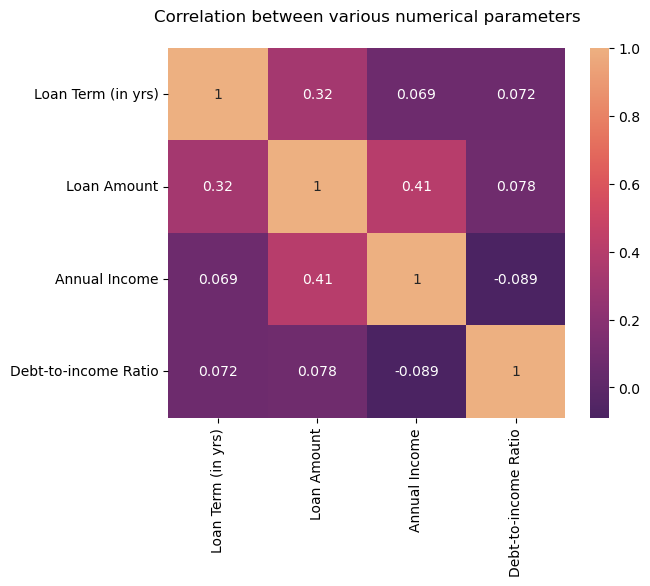

In [45]:
# Draw correlation between various numeric parameters
corr_params = ["term", "loan_amnt", "annual_inc", "dti"]
corr_labels = [labels[param] for param in corr_params]

plot = sns.heatmap(final_dataset[corr_params].corr(), cmap="flare_r", annot=True)
plot.set_title("Correlation between various numerical parameters", y=1.05)
plot.set_xticks(np.arange(0.5, len(corr_labels), 1), corr_labels, rotation=90)
plot.set_yticks(np.arange(0.5, len(corr_labels), 1), corr_labels, rotation=0)
plt.show()

# Derived Metrics

In [47]:
derived_dataset = final_dataset.copy()

In [48]:
# Calculate the percen of open accounts against total accounts
derived_dataset["percent_open_acc"] = (derived_dataset["open_acc"] / derived_dataset["total_acc"]) * 100
derived_dataset["percent_open_acc"] = derived_dataset["percent_open_acc"].apply(lambda val: int(val))
labels["percent_open_acc"] = "Percentage of Open Accounts"
derived_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,out_prncp,total_pymnt,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year,percent_open_acc
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.0,5863.16,0.00,171.62,0,1,2015,12,2011,33
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,0.0,1008.71,117.08,119.66,0,4,2013,12,2011,75
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.0,3005.67,0.00,649.91,0,6,2014,12,2011,20
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.0,12231.89,0.00,357.48,0,1,2015,12,2011,27
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,...,0.0,5632.21,0.00,161.03,0,1,2015,12,2011,75


In [49]:
# Calculate the number of months between loan issue date and last payment date

# Calculates the difference in months between two dates
def month_diff(row):
    return (row.last_pymnt_year - row.issue_year) * 12 + (row.last_pymnt_month - row.issue_month)

derived_dataset["no_of_installments"] = derived_dataset.apply(lambda row: month_diff(row), axis=1)
labels["no_of_installments"] = "No of installments"
derived_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_pymnt,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year,percent_open_acc,no_of_installments
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,5863.16,0.00,171.62,0,1,2015,12,2011,33,37
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,1008.71,117.08,119.66,0,4,2013,12,2011,75,16
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,3005.67,0.00,649.91,0,6,2014,12,2011,20,30
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,12231.89,0.00,357.48,0,1,2015,12,2011,27,37
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,...,5632.21,0.00,161.03,0,1,2015,12,2011,75,37


In [50]:
# Calculate monthly income of borrower based on annual income
derived_dataset["monthly_inc"] = derived_dataset["annual_inc"]/12
derived_dataset["monthly_inc"] = derived_dataset["monthly_inc"].apply(lambda val: int(val))
labels["monthly_inc"] = "Monthly Income"
derived_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year,percent_open_acc,no_of_installments,monthly_inc
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,0.00,171.62,0,1,2015,12,2011,33,37,2000
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,117.08,119.66,0,4,2013,12,2011,75,16,2500
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,0.00,649.91,0,6,2014,12,2011,20,30,1021
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,0.00,357.48,0,1,2015,12,2011,27,37,4100
5,5000,36,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,...,0.00,161.03,0,1,2015,12,2011,75,37,3000


In [51]:
# Create another copy of the dataset only containing Charged-Off Loans
charged_off_dataset = derived_dataset[derived_dataset["loan_status"] == "Charged Off"]
charged_off_dataset.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,last_pymnt_month,last_pymnt_year,issue_month,issue_year,percent_open_acc,no_of_installments,monthly_inc
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,117.08,119.66,0,4,2013,12,2011,75,16,2500
8,5600,60,21.28,152.39,F,4 years,OWN,40000.0,Source Verified,Charged Off,...,189.06,152.39,0,4,2012,12,2011,84,4,3333
9,5375,60,12.69,121.45,B,< 1 year,RENT,15000.0,Verified,Charged Off,...,269.29,121.45,0,11,2012,12,2011,66,11,1250
12,9000,36,13.49,305.38,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,444.30,305.38,0,7,2012,12,2011,44,7,2500
14,10000,36,10.65,325.74,B,3 years,RENT,100000.0,Source Verified,Charged Off,...,645.10,325.74,0,10,2013,12,2011,48,22,8333


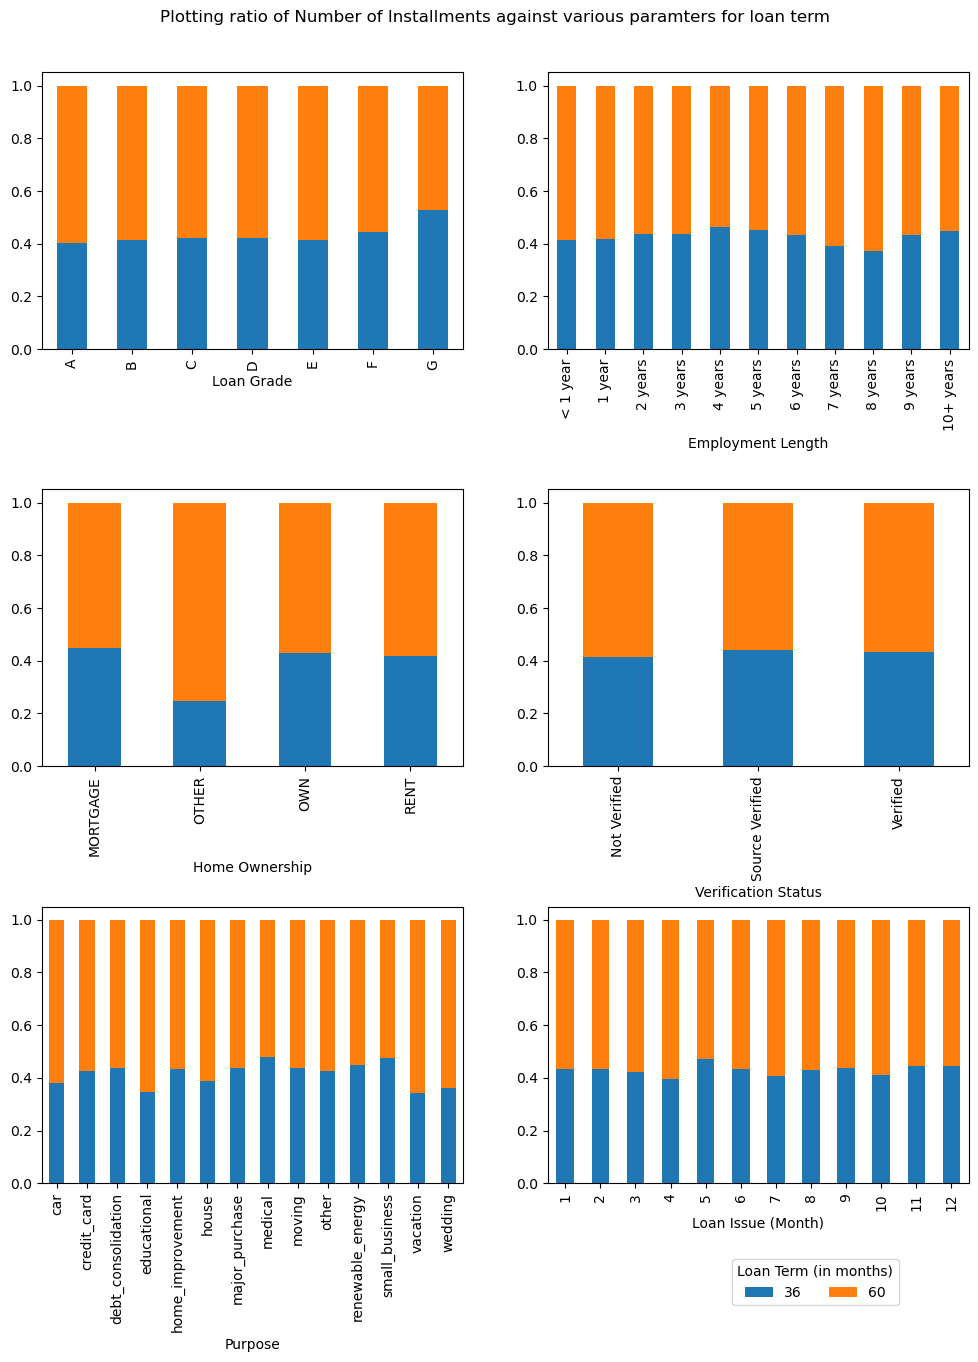

In [52]:
# Plot number of installment ratio using term for various categorical variables
columns = ["grade", "emp_length", "home_ownership", "verification_status", "purpose", "issue_month"]
unique_term = final_dataset["term"].unique()

dimX = 3
dimY = 2
i = 0
j = 0

fig, axs = plt.subplots(dimX, dimY)
fig.set_figwidth(10)
fig.set_figheight(4 * dimX)
fig.suptitle("Plotting ratio of Number of Installments against various paramters for loan term", y=1.01)
fig.tight_layout(h_pad=8, w_pad=3)

for col in columns:
    result = pd.pivot_table(charged_off_dataset, index=col, columns="term", values="no_of_installments", aggfunc="mean")
    col_plot = result[unique_term].apply(lambda row: row/row.sum(), axis=1).plot(ax=axs[i][j], kind="bar", stacked=True)
    col_plot.set_xlabel(labels[col])
    col_plot.get_legend().set_visible(False)
    j += 1
    if j == dimY:
        i += 1
        j = 0

plt.legend(unique_term, title="Loan Term (in months)", bbox_to_anchor=(0.85, -0.25), ncol=3)
plt.show()

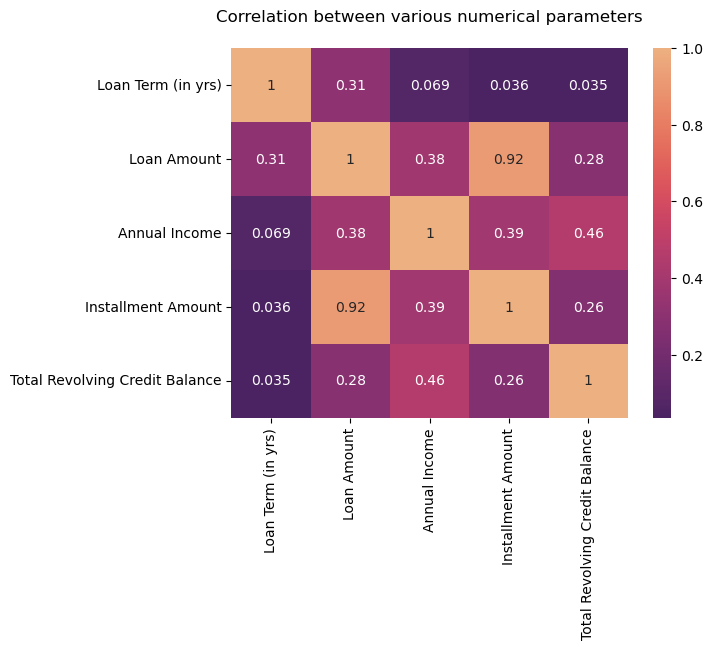

In [53]:
# Draw correlation between various numeric parameters
corr_params = ["term", "loan_amnt", "annual_inc", "installment", "revol_bal"]
corr_labels = [labels[param] for param in corr_params]

plot = sns.heatmap(charged_off_dataset[corr_params].corr(), cmap="flare_r", annot=True)
plot.set_title("Correlation between various numerical parameters", y=1.05)
plot.set_xticks(np.arange(0.5, len(corr_labels), 1), corr_labels, rotation=90)
plot.set_yticks(np.arange(0.5, len(corr_labels), 1), corr_labels, rotation=0)
plt.show()

# Conclusion

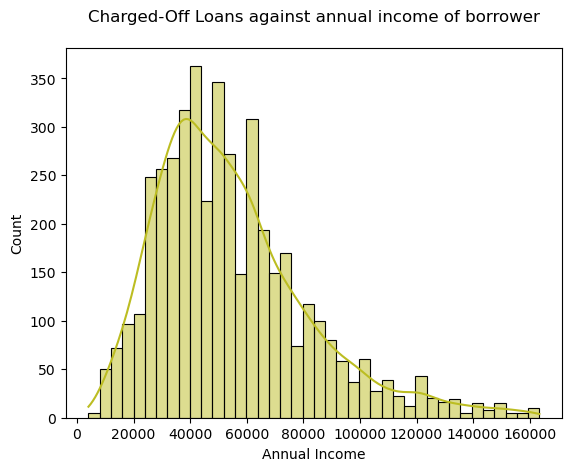

In [55]:
# Check final pattern on charged off entries against annual income
annual_inc_dataset_step1 = charged_off_dataset.copy()
sns.histplot(data=annual_inc_dataset_step1, x="annual_inc", kde=True, color=next(colors)["color"])
plt.title("Charged-Off Loans against annual income of borrower", y=1.05)
plt.xlabel(labels["annual_inc"])
plt.show()

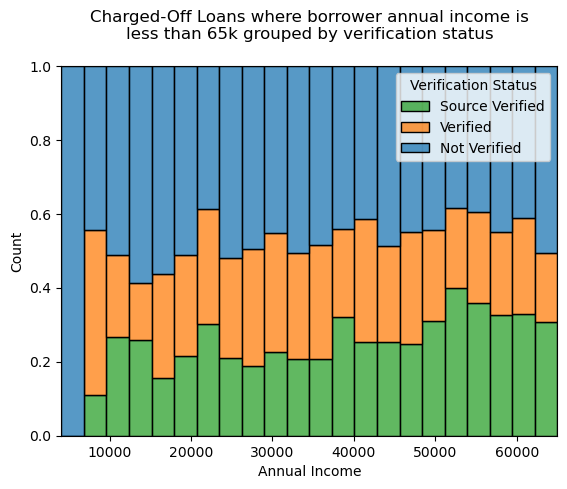

In [56]:
# Annual Income lower than 65k sees higher charge off, filter and see the pattern on verification status
annual_inc_dataset_step2 = annual_inc_dataset_step1[annual_inc_dataset_step1["annual_inc"] < 65000]
sns.histplot(data=annual_inc_dataset_step2, x="annual_inc", hue="verification_status", multiple="fill")
plt.title("Charged-Off Loans where borrower annual income is\nless than 65k grouped by verification status", y=1.05)
plt.xlabel(labels["annual_inc"])
plt.legend(annual_inc_dataset_step2.verification_status.unique(), title=labels["verification_status"])
plt.show()

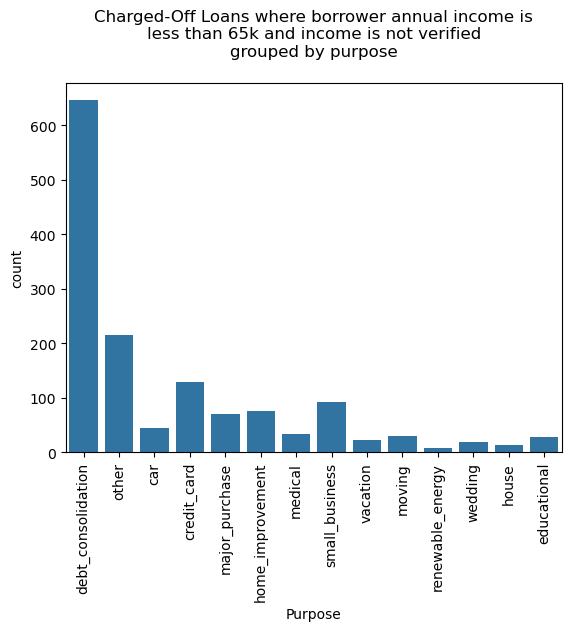

In [57]:
# Almost 50% of the charge offs happen where the income source is not verified, filter and see the pattern on purpose
annual_inc_dataset_step3 = annual_inc_dataset_step2[annual_inc_dataset_step2["verification_status"] == "Not Verified"]
sns.countplot(data=annual_inc_dataset_step3, x="purpose")
plt.title("Charged-Off Loans where borrower annual income is\nless than 65k and income is not verified\ngrouped by purpose", y=1.05)
plt.xticks(rotation=90)
plt.xlabel(labels["purpose"])
plt.show()

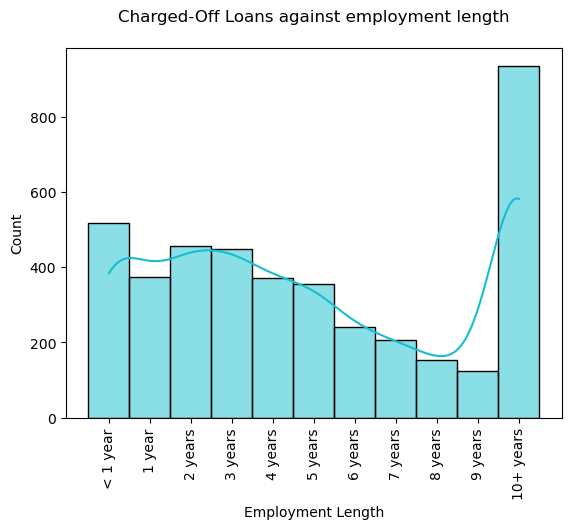

In [58]:
# Check final pattern on charged off entries against employment length
emp_length_dataset_step1 = charged_off_dataset.copy()
sns.histplot(data=emp_length_dataset_step1, x="emp_length", kde=True, color=next(colors)["color"])
plt.title("Charged-Off Loans against employment length", y=1.05)
plt.xticks(rotation=90)
plt.xlabel(labels["emp_length"])
plt.show()

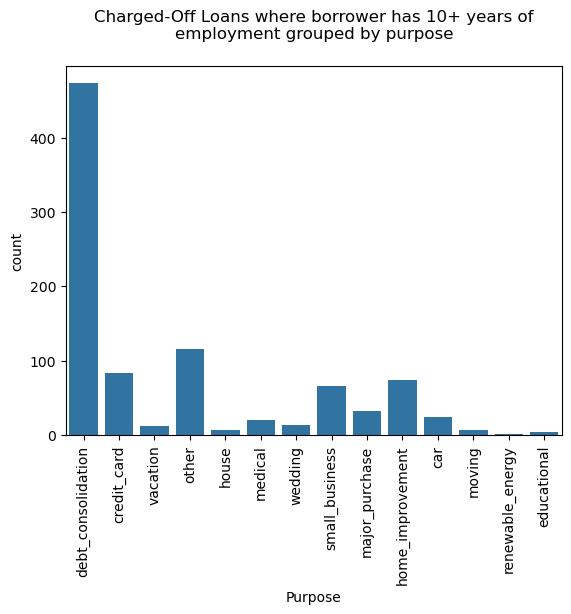

In [59]:
# 10+ years of employment in borrower file attract largest charge-off, filter and see the pattern on purpose
emp_length_dataset_step2 = emp_length_dataset_step1[emp_length_dataset_step1["emp_length"] == "10+ years"]
sns.countplot(data=emp_length_dataset_step2, x="purpose", color=next(colors)["color"])
plt.title("Charged-Off Loans where borrower has 10+ years of\nemployment grouped by purpose", y=1.05)
plt.xticks(rotation=90)
plt.xlabel(labels["purpose"])
plt.show()

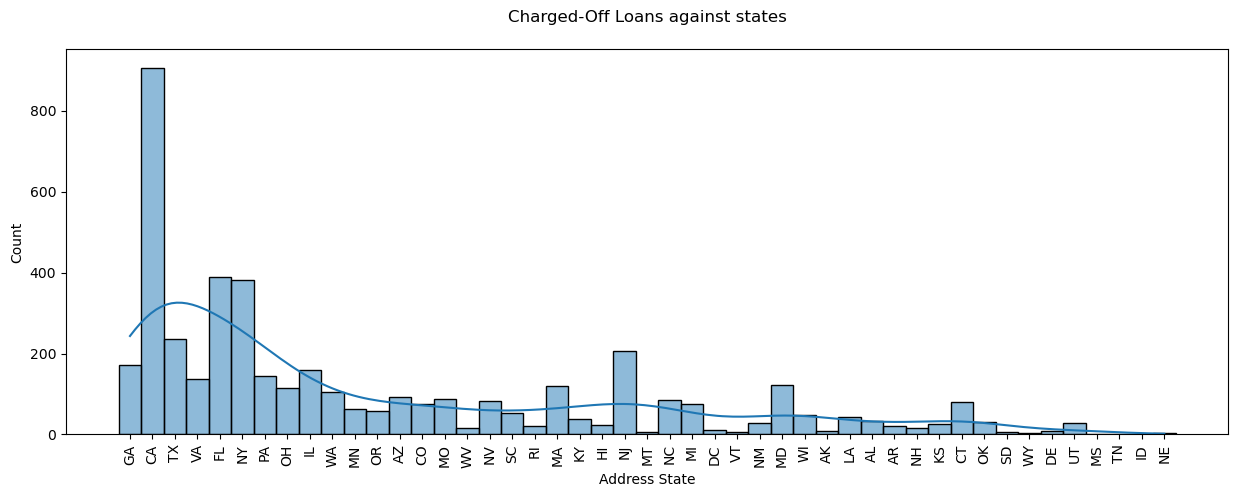

In [60]:
# Check final pattern on charged off entries against state
addr_state_dataset_step1 = charged_off_dataset.copy()
plt.figure(figsize=[15, 5])
sns.histplot(data=addr_state_dataset_step1, x="addr_state", kde=True)
plt.xticks(rotation=90)
plt.title("Charged-Off Loans against states", y=1.05)
plt.xlabel(labels["addr_state"])
plt.show()

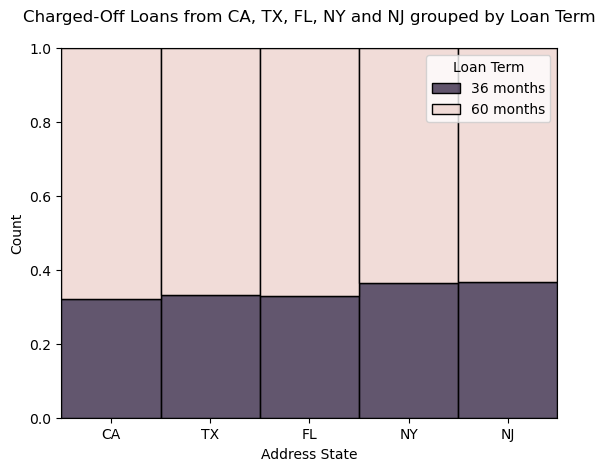

In [61]:
# Most of the defaulted loans come from CA, FL, NY, NJ and TX, filter and see pattern on loan term
addr_state_dataset_step2 = addr_state_dataset_step1[addr_state_dataset_step1["addr_state"].isin(["CA", "FL", "NY", "NJ", "TX"])]
sns.histplot(data=addr_state_dataset_step2, x="addr_state", hue="term", multiple="fill")
plt.title("Charged-Off Loans from CA, TX, FL, NY and NJ grouped by Loan Term", y=1.05)
plt.xlabel(labels["addr_state"])
plt.legend(["36 months", "60 months"], title="Loan Term")
plt.show()

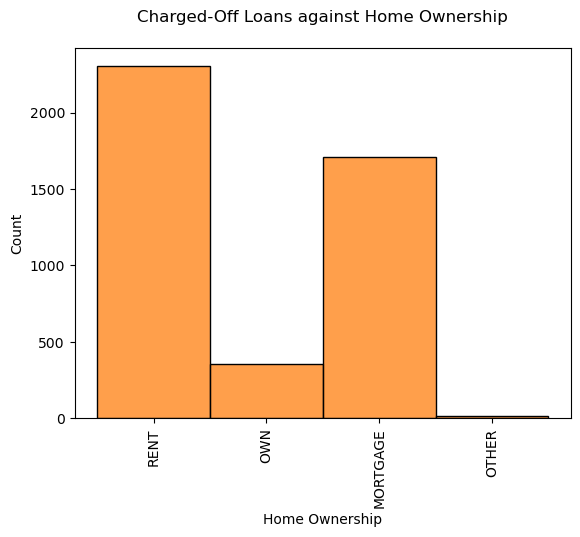

In [62]:
# Check final pattern on charged off entries against home ownership
home_owner_dataset_step1 = charged_off_dataset.copy()
sns.histplot(data=addr_state_dataset_step1, x="home_ownership", color=next(colors)["color"])
plt.xticks(rotation=90)
plt.title("Charged-Off Loans against Home Ownership", y=1.05)
plt.xlabel(labels["home_ownership"])
plt.show()

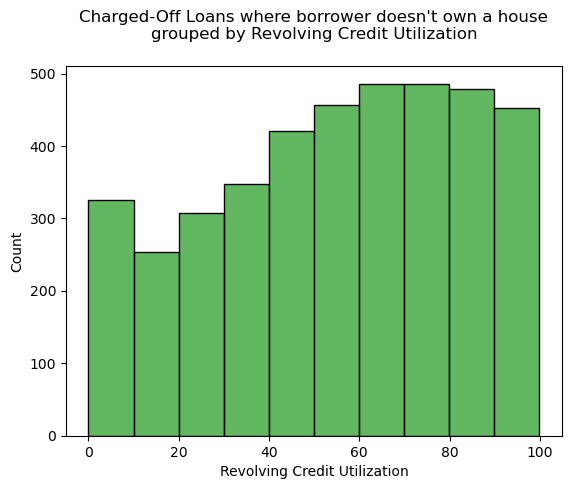

In [63]:
# Most of the borrower on Rent or Mortgage are defaulters, filter and check against revolving credit utilization
home_owner_dataset_step2 = home_owner_dataset_step1[home_owner_dataset_step1.home_ownership.isin(["RENT", "MORTGAGE"])]
sns.histplot(data=home_owner_dataset_step2, x="revol_util", bins=10, color=next(colors)["color"])
plt.title("Charged-Off Loans where borrower doesn't own a house\ngrouped by Revolving Credit Utilization", y=1.05)
plt.xlabel(labels["revol_util"])
plt.show()